# Time Series Analysis — Hotel Booking Trends

This notebook analyzes booking volume, cancellations, and revenue trends over time.


In [1]:
#Load the Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/python_cleaned/hotel_bookings_features.csv", parse_dates=["arrival_date"])
df.shape


(87486, 41)

Create Monthly Time Index

In [2]:
df['year_month']=df['arrival_date'].dt.to_period("M").astype(str)

Booking Volume Over Time

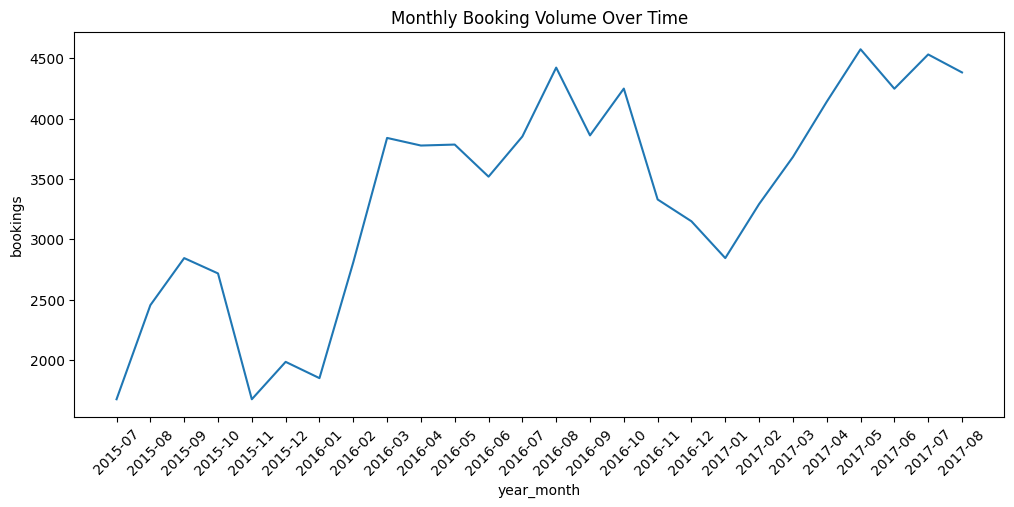

In [3]:
monthly_bookings = df.groupby("year_month").size().reset_index(name="bookings")

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_bookings, x="year_month", y="bookings")
plt.xticks(rotation=45)
plt.title("Monthly Booking Volume Over Time")
plt.show()


Cancellation Rate Over Time

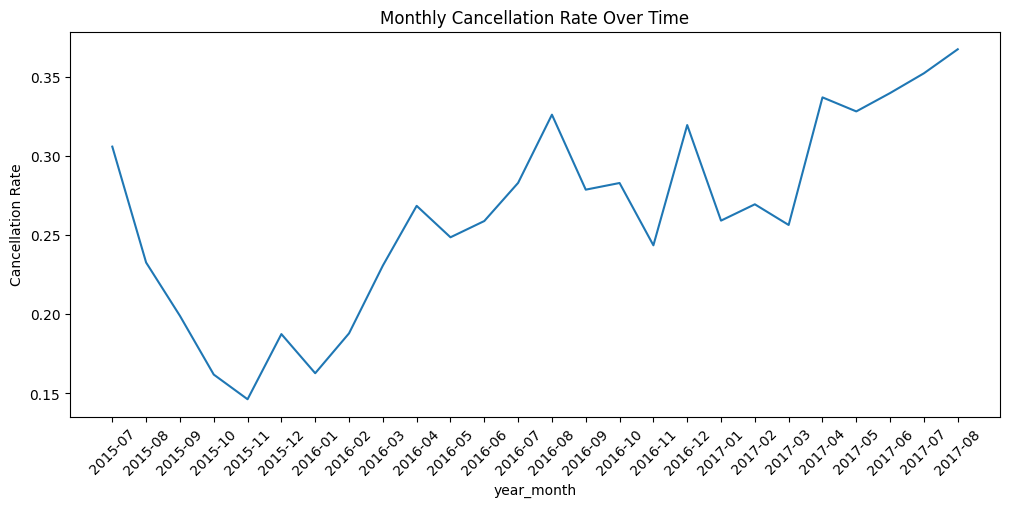

In [4]:
monthly_cancel = df.groupby("year_month")["is_canceled"].mean().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_cancel, x="year_month", y="is_canceled")
plt.xticks(rotation=45)
plt.title("Monthly Cancellation Rate Over Time")
plt.ylabel("Cancellation Rate")
plt.show()


Revenue Over Time

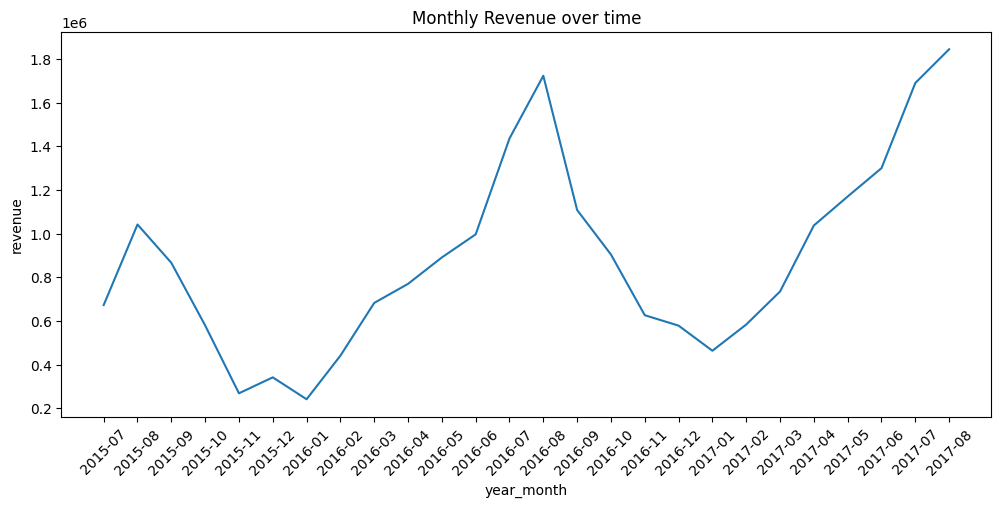

In [5]:
monthly_revenue=df.groupby('year_month')['revenue'].sum().reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_revenue,x="year_month",y="revenue")
plt.xticks(rotation=45)
plt.title("Monthly Revenue over time")

plt.show()

**Insights**
- Time-series analysis reveals strong seasonality in bookings and revenue, with consistent peaks during mid-year and dips toward the end of each year. While both booking volume and revenue show an overall upward trend from 2015 to 2017, the cancellation rate also increases steadily over time, reaching above 35% in 2017. This suggests that although demand is growing, booking behavior is becoming more uncertain, increasing revenue volatility and highlighting the importance of improving cancellation management strategies.